In [56]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='darkgrid')


In [3]:
iris_bunch = load_iris(as_frame=True)
iris_df = iris_bunch.frame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: >

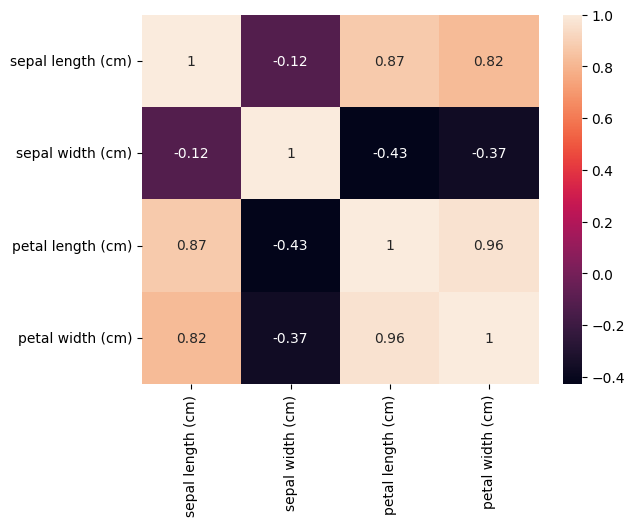

In [17]:

sns.heatmap(data=iris_df.drop(columns={'target'}).corr(),annot=True)

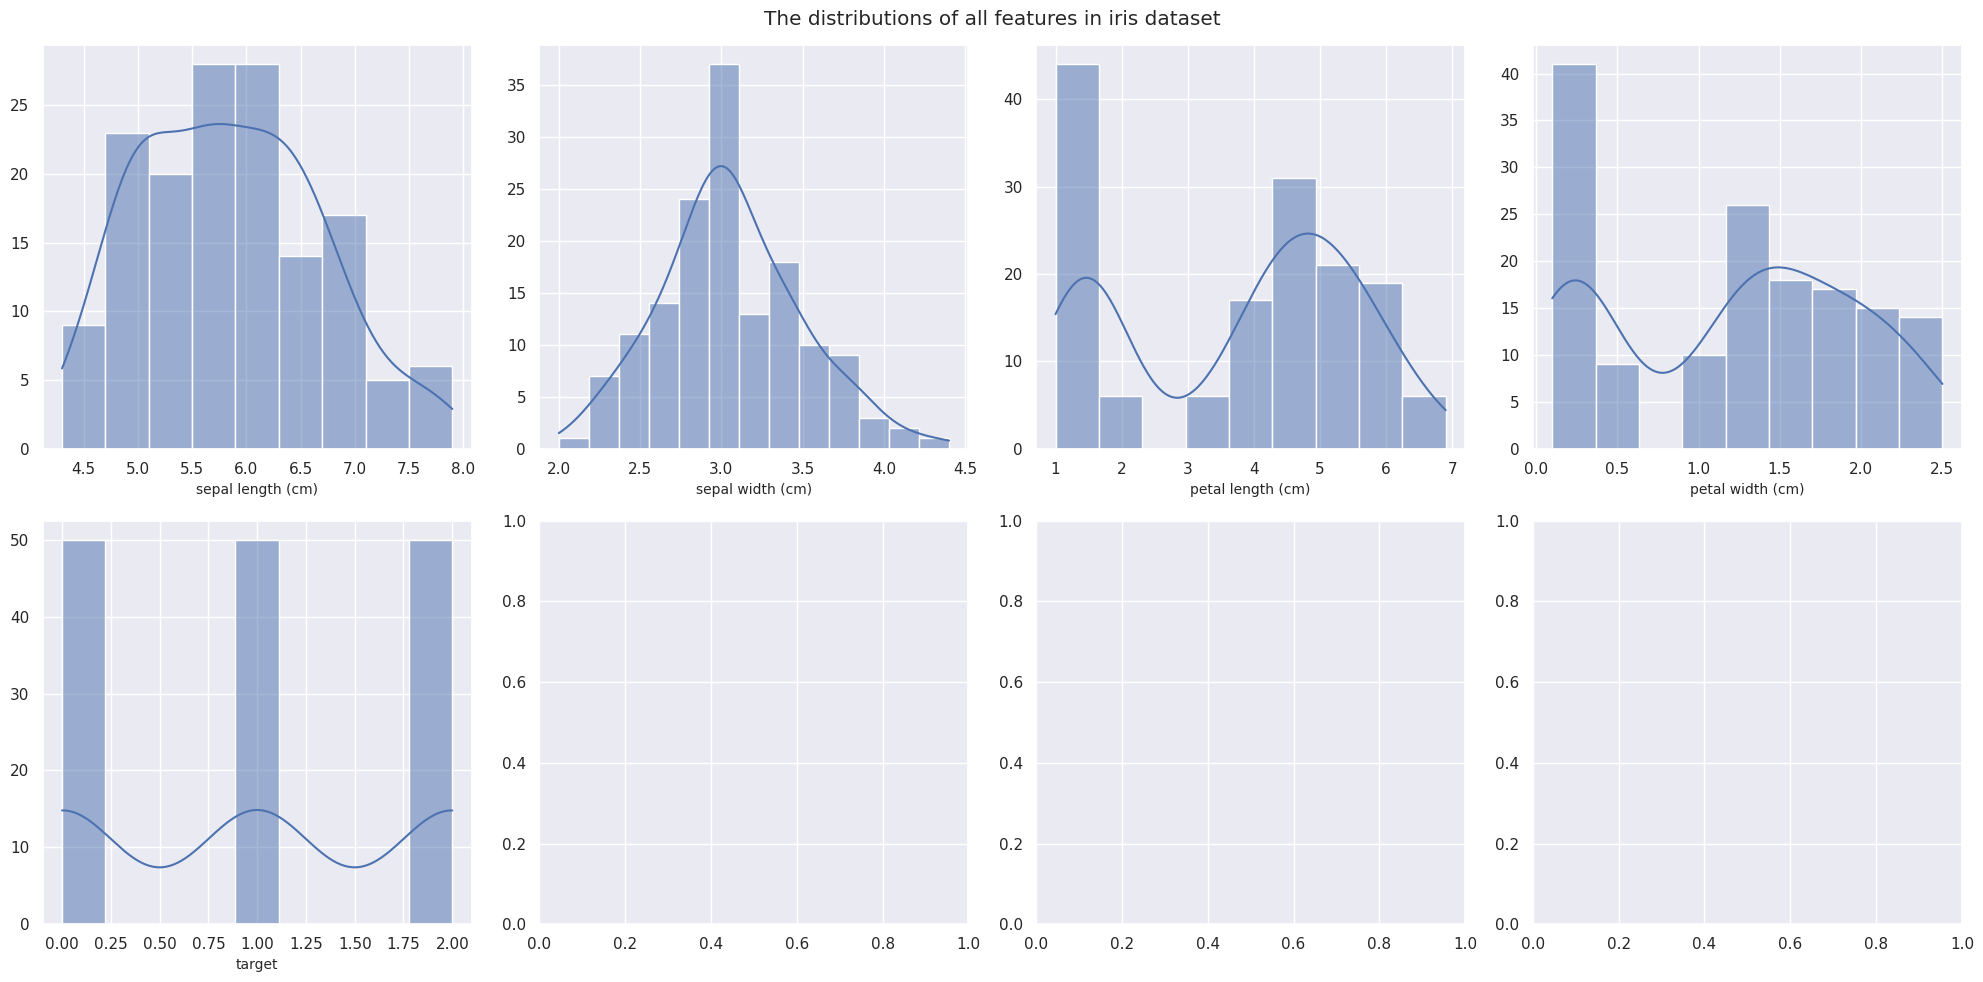

In [24]:
# Select Categorical column in train_df

numerical_columns = iris_df.select_dtypes(include='number')

num_cols = 4
num_rows = (numerical_columns.shape[1] + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*5))

axes = axes.ravel()

fig.suptitle("The distributions of all features in iris dataset")

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(iris_df[column], kde=True, ax=ax)
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel("", fontsize=10)


# remove empty subplots if necessary
for i in range(len(numerical_columns), num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()




In [25]:
X = iris_df.drop(columns={'target'})
y = iris_df[['target']]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)

In [38]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [44]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)




/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [45]:
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [47]:
X_train_scaled

array([[ 0.61303014,  0.10850105,  0.94751783,  0.736072  ],
       [-0.56776627, -0.12400121,  0.38491447,  0.34752959],
       [-0.80392556,  1.03851009, -1.30289562, -1.33615415],
       [ 0.25879121, -0.12400121,  0.60995581,  0.736072  ],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25412853],
       [-0.80392556, -0.82150798,  0.04735245,  0.21801546],
       [-0.21352735,  1.73601687, -1.19037495, -1.20664002],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47704373],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34752959],
       [-0.09544771, -1.05401024,  0.10361279, -0.04101281],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.1246144 ],
       [-1.39432376,  0.34100331, -1.41541629, -1.33615415],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38364267],
       [-1.04008484,  1.03851009, -1.24663528, -0.81809761],
       [-0.56776627,  1.50351461, -1.30289562, -1.33615415],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.30004108],
       [ 0.73110978, -0.

In [53]:
transformer = ColumnTransformer([
    ("scalar", StandardScaler(), X_train.columns)
]
)

X_train_scaled = transformer.fit_transform(X_train)


In [55]:
X_train_scaled

array([[ 0.61303014,  0.10850105,  0.94751783,  0.736072  ],
       [-0.56776627, -0.12400121,  0.38491447,  0.34752959],
       [-0.80392556,  1.03851009, -1.30289562, -1.33615415],
       [ 0.25879121, -0.12400121,  0.60995581,  0.736072  ],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25412853],
       [-0.80392556, -0.82150798,  0.04735245,  0.21801546],
       [-0.21352735,  1.73601687, -1.19037495, -1.20664002],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47704373],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34752959],
       [-0.09544771, -1.05401024,  0.10361279, -0.04101281],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.1246144 ],
       [-1.39432376,  0.34100331, -1.41541629, -1.33615415],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38364267],
       [-1.04008484,  1.03851009, -1.24663528, -0.81809761],
       [-0.56776627,  1.50351461, -1.30289562, -1.33615415],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.30004108],
       [ 0.73110978, -0.

In [79]:
model = keras.Sequential([
    layers.Dense(units=4, input_shape=[X_train_scaled.shape[1]], activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(1, activation='relu')
])

/home/lovecrush/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.compile(optimizer='adam', loss='ce', metrics=['accuracy'])


In [60]:
# early = EarlyStopping(patience=5,min_delta=0.005, restore_best_weights=True)

In [91]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=50,  verbose=True, validation_data=(X_test_scaled, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.3325 - loss: 16.5345 - val_accuracy: 0.3667 - val_loss: 13.4317
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3500 - loss: 15.9703 - val_accuracy: 0.3667 - val_loss: 13.4317
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3375 - loss: 16.4539 - val_accuracy: 0.3667 - val_loss: 13.4317
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3200 - loss: 16.8568 - val_accuracy: 0.3667 - val_loss: 13.4317
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3400 - loss: 16.4539 - val_accuracy: 0.3667 - val_loss: 13.4317
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2975 - loss: 17.6225 - val_accuracy: 0.3667 - val_loss: 13.4317
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3475 - loss: 16.3733 - val_accuracy: 0.3667 - val_loss: 13.4317
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3450 - loss: 16.2121 - val_accuracy: 0.

<Axes: >

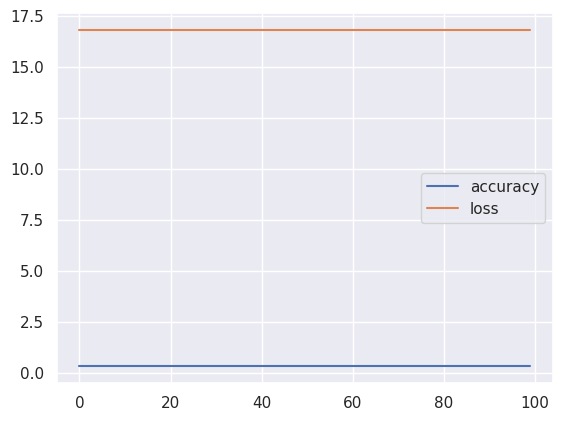

In [82]:
pd.DataFrame(history.history).plot()

In [86]:
knn_params = [{'n_neighbors': list(range(10, 30))}]

clf = GridSearchCV(
    KNeighborsClassifier(), knn_params,cv=5, scoring='accuracy'
)

clf.fit(X_train_scaled, y_train)

/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20, 21, 22, 23, 24, 25, 26, 27,
                                          28, 29]}],
             scoring='accuracy')

In [88]:
y_pred = clf.best_estimator_.predict(X_test_scaled)

In [90]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

